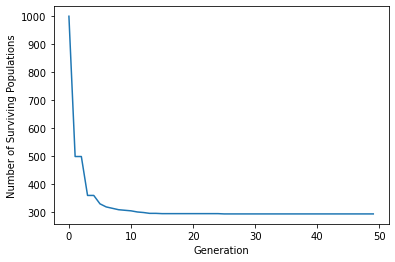

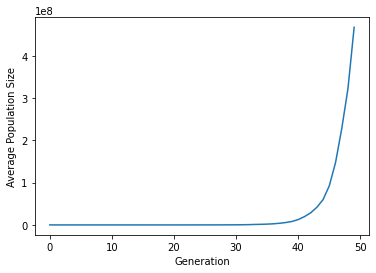

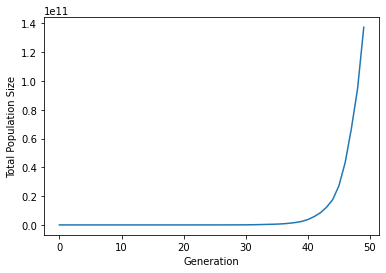

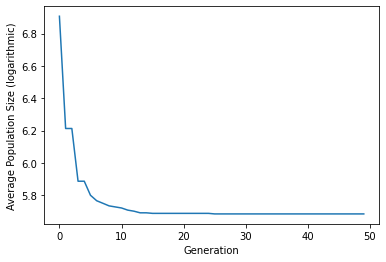

Slope of surviving populations graph: -3.06
Slope of average population size graph: 3119768.32
Slope of total population size graph: 917211859.72
Correlation between Total population size and average population size: 1.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Number of poulations needed
n_populations  = 1000

# Create 1000 replicate population of one individual
populations  = np.ones(n_populations)

# Number of generations simulated 
n_generations = 50

# Lists to store data 
surviving_populations  = []
average_populations = []
total_populations = []

# Simulation process for i generations 
for i in range(n_generations):
    extinct = populations <= 0
    surviving_populations.append(len(populations[~extinct]))
    average_populations.append(np.mean(populations[~extinct]))
    total_populations.append(np.sum(populations[~extinct]))
    
    for j in range(n_populations):
        e = np.random.rand()
        if e < 0.5:
            populations[j] = populations[j]-1     
            
        if e > 0.5:
            populations[j] = populations[j] * 2
            
 
# Plot the results 

# Population Growth Graph

plt.plot(range(n_generations), surviving_populations)
plt.xlabel("Generation")
plt.ylabel("Number of Surviving Populations")
plt.show()

# Average Population Size vs Generation Graph
plt.plot(range(n_generations), average_populations)
plt.xlabel("Generation")
plt.ylabel("Average Population Size")
plt.show()

# Total Population Size vs Generation Graph
plt.plot(range(n_generations), total_populations) 
plt.xlabel("Generation")
plt.ylabel("Total Population Size")
plt.show()     
            

# Population growth graph using logarithmic functions for y axis
plt.plot(range(n_generations), np.log(surviving_populations))
plt.xlabel("Generation")
plt.ylabel("Average Population Size (logarithmic)")
plt.show()


# Quantify results 
x = range(n_generations)

slope1, _, _, _, _ = stats.linregress(x, surviving_populations)
slope2, _, _, _, _ = stats.linregress(x, average_populations)
slope3, _, _, _, _ = stats.linregress(x, total_populations)

corr1 = np.corrcoef(surviving_populations, average_populations)[0, 1]
corr2= np.corrcoef(surviving_populations, total_populations)[0, 1]
corr3 = np.corrcoef(average_populations, total_populations)[0, 1]

print(f'Slope of surviving populations graph: {slope1:.2f}')
print(f'Slope of average population size graph: {slope2:.2f}')
print(f'Slope of total population size graph: {slope3:.2f}')
print(f'Correlation between Total population size and average population size: {corr3:.2f}')
